# Tree-Based Methods

In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn import tree
from six import StringIO  

import graphviz
import matplotlib.pyplot as plt
import pydot
from IPython.display import Image

%matplotlib inline   
plt.style.use('seaborn-white')

# Decision Trees

Here, we will describe tree-based methods for regression and classification. These involve stratifying or segmenting the predictor space into a number of simple regions. In order to make a prediction for a given observation, we typically use the mean or the mode of the training observations in the region to which it belongs. Since the set of splitting rules used to segment the predictor space can be summarized in a tree, these types of approaches are known as decision tree methods.

## Classification Trees

A classification tree is used to predict or classify a qualitative response. For a classification tree, we predict that each observation belongs to the most commonly occurring class of training observations in the region to which it belongs. 

We first use classification trees to analyze the Carseats data set. In these data, Sales is a continuous variable, and so we begin by recoding it as a binary variable. We use the map() function to create a variable, called High, which takes on a value of 'Y' if the Sales variable exceeds 8, and takes on a value of 'N' otherwise. In Python, we need to code catergorical variable into dummy variable.

In [64]:
carseats = pd.read_csv('../data/Carseats.csv')
print(carseats.head())
carseats['High'] = carseats.Sales.map(lambda x: 'Y' if x>8 else 'N')
carseats.ShelveLoc = pd.factorize(carseats.ShelveLoc)[0]
carseats.Urban = carseats.Urban.map({'No':0, 'Yes':1})
carseats.US = carseats.US.map({'No':0, 'Yes':1})
print(carseats.head())

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  
   Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97

In [65]:
X = carseats.drop(['Sales','High'], axis=1)
y = carseats.High
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=200, random_state=0)

In [66]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=6, min_samples_leaf=4)
clf_gini.fit(X_train, y_train)
print(clf_gini.score(X_train, y_train))

0.9


The most attractive feature of a tree is visulization. Here we first need to save the model file into a .dot file and graphviz.Source to display it.

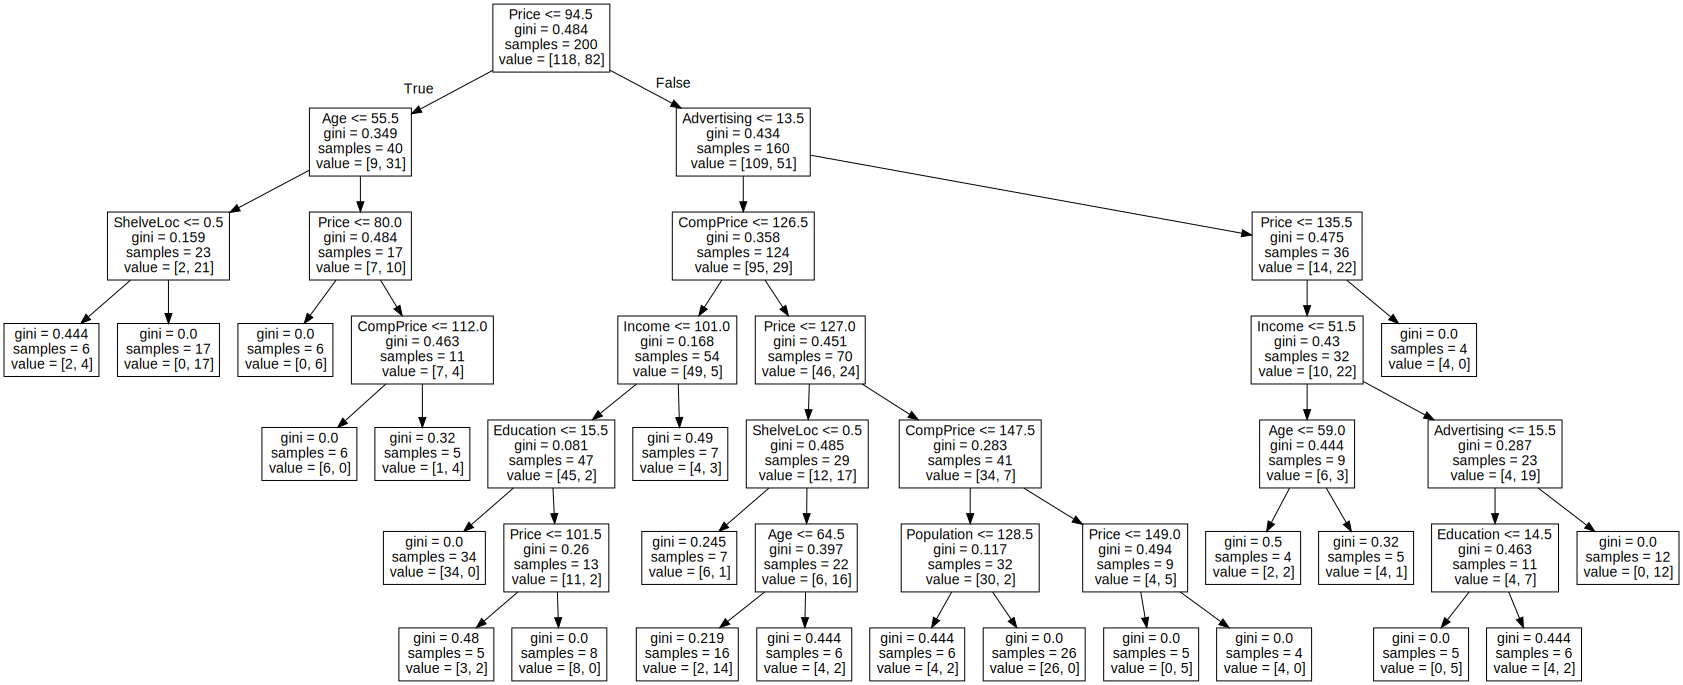

In [67]:
export_graphviz(clf_gini, out_file="mytree.dot", feature_names=X_train.columns)

with open("mytree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [68]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

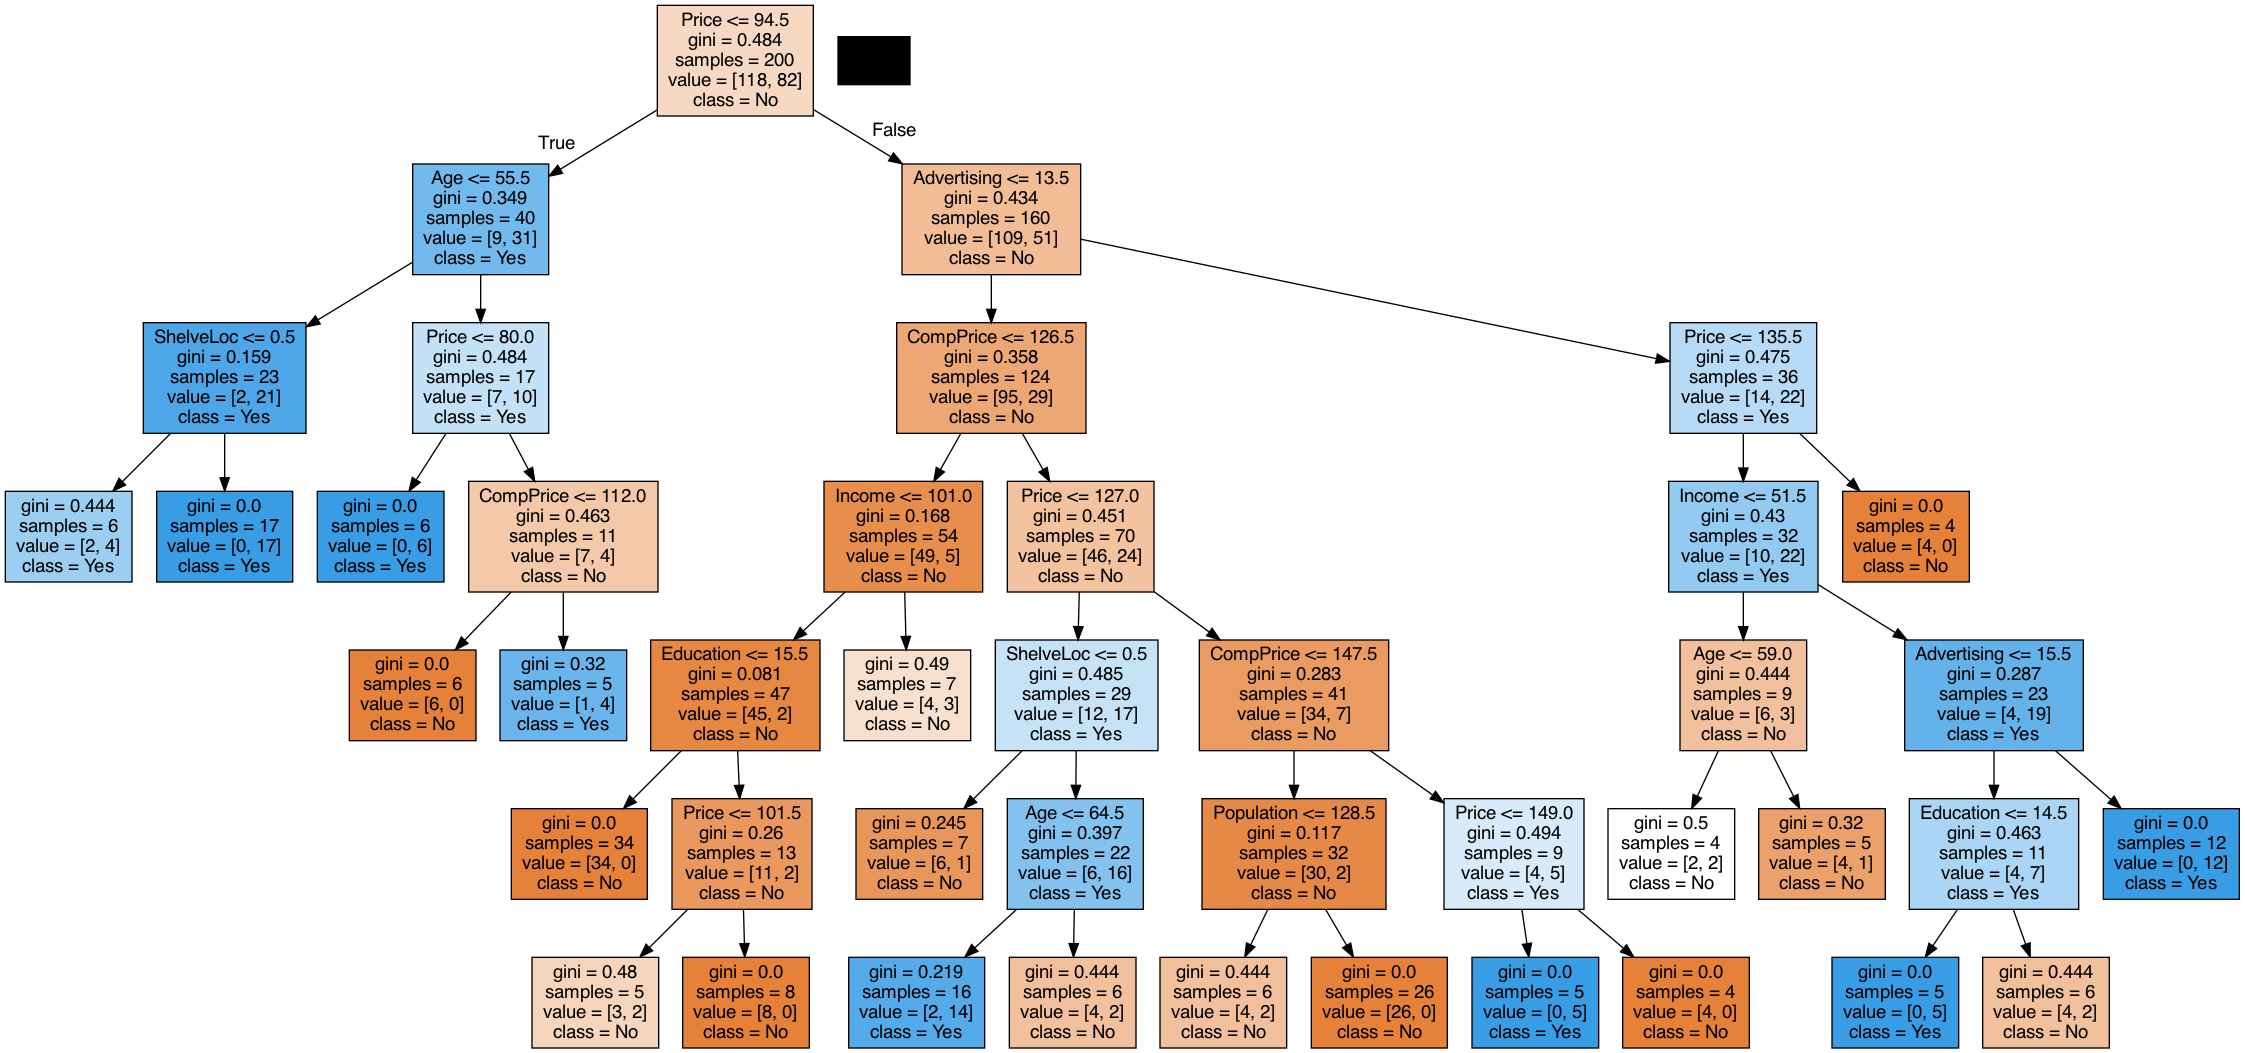

In [69]:
graph2, = print_tree(clf_gini, features=X_train.columns, class_names=['No', 'Yes'])
Image(graph2.create_png())

In [70]:
y_pred = clf_gini.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print(cm)
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

     No  Yes
No   99   32
Yes  19   50
Accuracy is  74.5


The test accuracy of our model is significant lower than our training result, this may indicate overfitting. we can go back and change the hyperparameters in the training process to reduce the dimension of the parameter space.

## Regression Trees
Here we fit a regression tree to the Boston data set. First, we create a training set, and fit the tree to the training data. Since Python does not support prune, let us fit the max_depth at 2.

In [50]:
boston = pd.read_csv('../data/Boston.csv')
X = boston.drop('medv', axis=1)
y = boston.medv
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)
regr_tree = DecisionTreeRegressor(max_depth=2)
regr_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

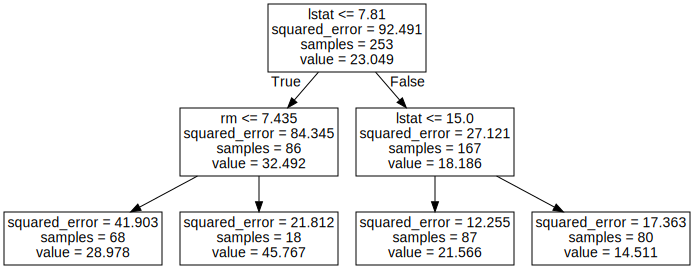

In [51]:
export_graphviz(regr_tree, out_file="mytree.dot", feature_names=X_train.columns)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [52]:
y_pred = regr_tree.predict(X_test)
mean_squared_error(y_test, y_pred)

28.80154486445795

## Bagging and Random Forests
Here we apply bagging and random forests to the Boston data, using the randomForest package in Python. The exact results obtained in this section may depend on the version of Python and the version of the randomForest package installed on your computer. Recall that bagging is simply a special case of a random forest with m = p. Therefore, the randomForest() function can be used to perform both random forests and bagging. We perform bagging as follows:

In [53]:
all_features = X_train.shape[1]
regr_bagging = RandomForestRegressor(max_features=all_features, random_state=1, n_estimators= 10)
regr_bagging.fit(X_train, y_train)

RandomForestRegressor(max_features=13, n_estimators=10, random_state=1)

In [54]:
y_pred = regr_bagging.predict(X_test)
mean_squared_error(y_test, y_pred)

17.67618735177866

In [55]:
X_train.shape

(253, 13)

In [56]:
regr_rf = RandomForestRegressor(max_features=3, random_state=1, n_estimators= 10)
regr_rf.fit(X_train, y_train)

y_pred = regr_rf.predict(X_test)
mean_squared_error(y_test, y_pred)

18.021533596837944

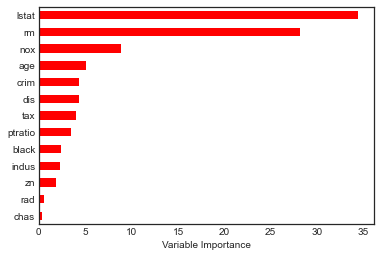

In [57]:
Importance = pd.DataFrame({'Importance':regr_rf.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## Boosting
Here we use the GradientBoostingRegressor package. The argument n_estimators=500 indicates that we want 500 trees, and the option interaction.depth=4 limits the depth of each tree.

In [58]:
regr_boost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.02, max_depth=4, random_state=1)
regr_boost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=4, n_estimators=500,
                          random_state=1)

Let us check the feature importance and MSE.

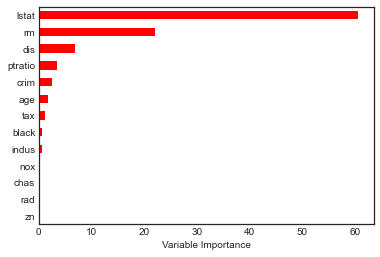

In [59]:
Importance = pd.DataFrame({'Importance':regr_boost.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [60]:
y_pred = regr_boost.predict(X_test)
mean_squared_error(y_test,y_pred)

16.99803803771022